#Regression Model

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)


#Training Data Pre-Processing

In [73]:
full_data = pd.read_csv('/content/titanic_dataset.csv')

In [74]:
full_data.shape

(891, 12)

In [75]:
full_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**MIssing Data**

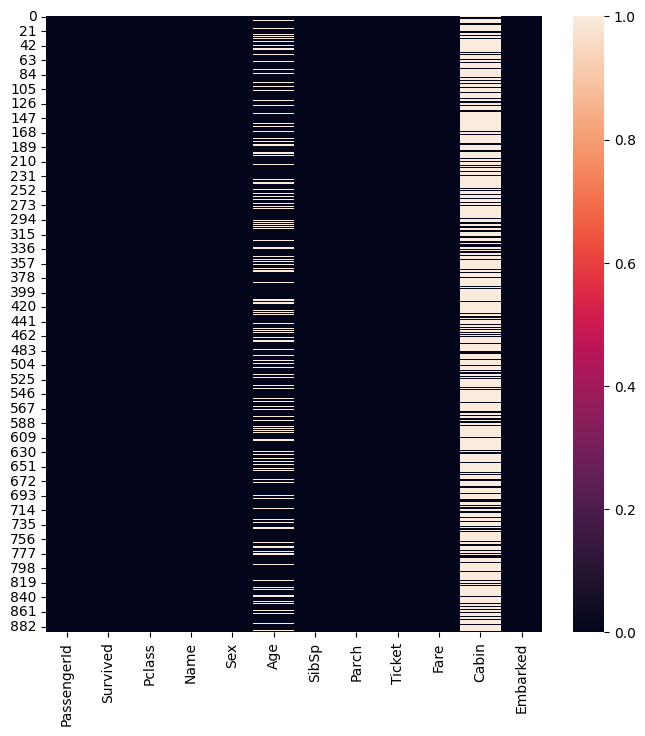

In [77]:
plt.figure(figsize=(8,8))
sns.heatmap(full_data.isnull(), )
plt.show()

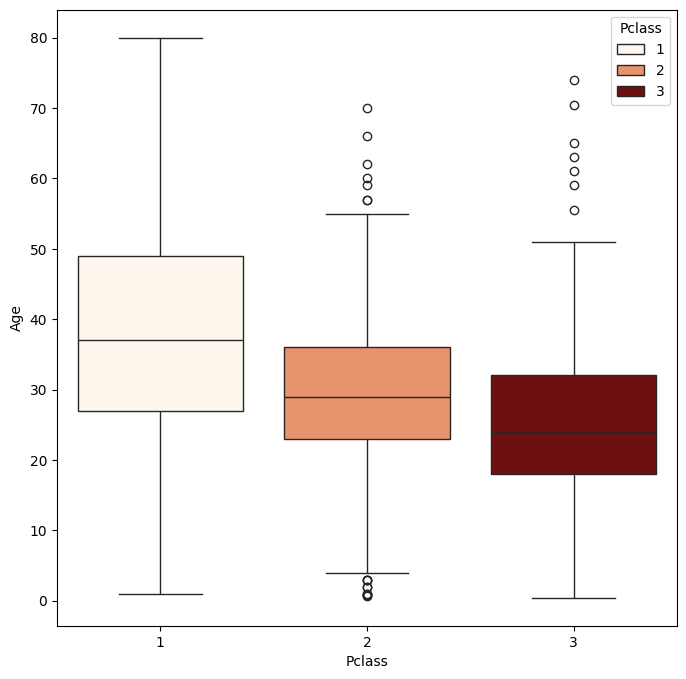

In [78]:
 plt.figure(figsize=(8,8))
 sns.boxplot(x='Pclass', y='Age', hue='Pclass', palette='OrRd',data=full_data)
 plt.show()

In [79]:
# Imputation function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:

            return 29

        else:
            return 24

    else:
        return Age

# Apply the function to the Age column
full_data['Age']=full_data[['Age','Pclass']].apply(impute_age, axis =1 )

**Removing Columns**

Removing cabin from thwe table as it is not helpful in providing informatiuon about survival of

In [80]:
full_data.drop('Cabin', axis=1, inplace=True)

In [81]:
full_data.dropna(inplace = True)

In [82]:
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [83]:

full_data.drop(['Name','Ticket'], axis = 1, inplace = True) # Remove unnecessary columns


objcat = ['Sex','Embarked'] # Converting objects to category

for colname in objcat:
    full_data[colname] = full_data[colname].astype('category')

In [84]:
full_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


**Numeric Features**

In [85]:
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Remove PassengerId**

In [86]:

full_data.drop('PassengerId', inplace = True, axis = 1)

#Getting Models Ready

**Printing Shape**

In [87]:
full_data.shape

(889, 8)

**Identifiying categorical feature**

In [88]:
full_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

**Creating Dummies**

In [89]:
Sex= pd.get_dummies(full_data.Sex, prefix='Sex', dtype=int).iloc[:, 1:]

In [91]:
Embarked= pd.get_dummies(full_data.Embarked, prefix='Embarked', dtype=int).iloc[:, 1:]

In [94]:
full_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [97]:
full_data= pd.concat([full_data, Sex, Embarked], axis = 1)


In [98]:
full_data.head(7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1
5,0,3,male,24.0,0,0,8.4583,Q,1,1,0
6,0,1,male,54.0,0,0,51.8625,S,1,0,1


In [99]:
# Drop unecessary columns
full_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

# Shape of train data
print('train_data shape',full_data.shape)

# Confirm changes
full_data.head()

train_data shape (889, 9)


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#OBJECTIVE 2: MACHINE LEARNING

**Target Variable Splitting**

In [111]:

x = full_data.drop('Survived', axis = 1)

y = full_data['Survived']

In [103]:
x
x.shape

(889, 8)

In [110]:

y.shape

(889,)

In [104]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [106]:
x_train.shape
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
307,1,17.0,1,0,108.9000,0,0,0
229,3,24.0,3,1,25.4667,0,0,1
82,3,24.0,0,0,7.7875,0,1,0
353,3,25.0,1,0,17.8000,1,0,1
707,1,42.0,0,0,26.2875,1,0,1
...,...,...,...,...,...,...,...,...
576,2,34.0,0,0,13.0000,0,0,1
840,3,20.0,0,0,7.9250,1,0,1
338,3,45.0,0,0,8.0500,1,0,1
524,3,24.0,0,0,7.2292,1,0,0


In [112]:

y_train

,Survived
307,1
229,0
82,1
353,0
707,1
...,...
576,1
840,0
338,1
524,0


In [108]:
x_test.shape
x_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
511,3,24.0,0,0,8.0500,1,0,1
613,3,24.0,0,0,7.7500,1,1,0
615,2,24.0,1,2,65.0000,0,0,1
337,1,41.0,0,0,134.5000,0,0,0
718,3,24.0,0,0,15.5000,1,1,0
...,...,...,...,...,...,...,...,...
155,1,51.0,0,1,61.3792,1,0,0
450,2,36.0,1,2,27.7500,1,0,1
756,3,28.0,0,0,7.7958,1,0,1
187,1,45.0,0,0,26.5500,1,0,1



#1. LOGISTIC REGRESSION

**Model Training**

In [113]:

from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

**Model Evaluation**

In [114]:
from sklearn.metrics import accuracy_score

y_pred_log_reg = log_reg.predict(x_test) #predicted value

print('Logistic Regression')

print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 82.02 %


#2. Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier
print("Decision tree Classifier")
Dtree = DecisionTreeClassifier()

Dtree.fit(x_train, y_train)

Decision tree Classifier


DecisionTreeClassifier()

**Model Evaluation**

In [121]:
from sklearn.metrics import accuracy_score
y_pred_Dtree = Dtree.predict(x_test)
print("Decision Tree")

print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree)*100,2)
print("accuracy", Dtree_accuracy, '%')

Decision Tree
------------------------------------------------------------
accuracy 79.21 %


#3. Random Forest

**Model Training**

In [122]:
from sklearn.ensemble import RandomForestClassifier
print("Random Forest Classifier")
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

In [123]:
from sklearn.metrics import accuracy_score
y_pred_rfc = rfc.predict(x_test)
print("Random Forest")

print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_Dtree)*100,2)
print("accuracy", rfc_accuracy, '%')

Random Forest
------------------------------------------------------------
accuracy 79.21 %


#4. Gradient Bossting Classifier

**Model Training**

In [124]:
from sklearn.ensemble import GradientBoostingClassifier
print("Gradient Boosting Classifier")
gbc = GradientBoostingClassifier()

gbc.fit(x_train, y_train)

Gradient Boosting Classifier


GradientBoostingClassifier()

**Model Evaluation**

In [127]:
from sklearn.metrics import accuracy_score
y_pred_gbc= gbc.predict(x_test)
print('Gradient Boositng Classifier')

print('--'*30)
gbc_accuracy = round(accuracy_score(y_test, y_pred_gbc)*100,2)
print("accuracy",gbc_accuracy, '%')

Gradient Boositng Classifier
------------------------------------------------------------
accuracy 84.27 %


In [128]:
model_scores = {
    "Logistic Regression": log_reg_accuracy,
    "Decision Tree Classifier": Dtree_accuracy,
    "Random Forest Classifier": rfc_accuracy,
    "Gradient Boosting Classifier": gbc_accuracy
}

sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (Greater Values are better):
1. Gradient Boosting Classifier: 84.27
2. Logistic Regression: 82.02
3. Decision Tree Classifier: 79.21
4. Random Forest Classifier: 79.21
